In [74]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [75]:
#read the file
data = pd.read_csv("C:/Users/aalpe/OneDrive/Masaüstü/NetflixOriginals.csv")
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [76]:
print(f"Columns: \n {data.columns} \n\n Data Types: \n {data.dtypes}")


Columns: 
 Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object') 

 Data Types: 
 Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [78]:
# Verinin içinde eksik var mı kontrol ediyoruz.
data.isna().sum()
data.isnull().sum()

# boş veri olsaydı doldurmak için aşağıdaki şekilde kullanacaktık.
# data.fillna(ortalamabirdeğer)

# tekrar eden veriyi de kontrol ediyoruz.
data.duplicated().sum()


0

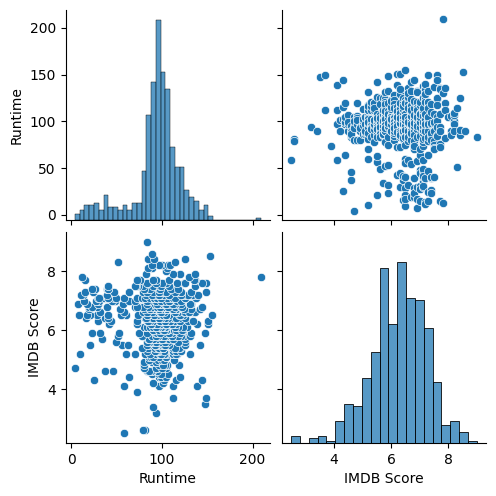

In [79]:
#pairplot kullanarak hızlıca sayısal verilerin analizine bakıyoruz.
sns.pairplot(data)

In [80]:
# Yayınlanma tarihini analizi kolaylaştırmak için to_datetime kullanarak çeviriyoruz ve yeni kolon ekliyoruz. YY-MM-DD
data["date_new"] = pd.to_datetime(data["Premiere"])
data.head()



,Title,Genre,Premiere,Runtime,IMDB Score,Language,date_new
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30


93.57705479452055
          Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000


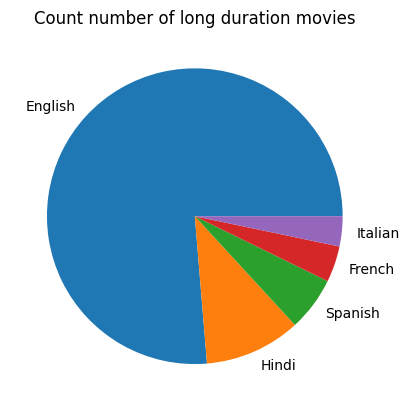

In [81]:
# 1- Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?

print(data.Runtime.mean())
#sayısal verilerin nasıl dağıldığını görnek için hızlı bir yöntem
print(data.describe())
data.sort_values("Runtime", ascending=False)

#mean değerinden yüksek olan filmleri uzun soluklu olarak aldık ve top 5 dili görselleştirdik.

data_long = data[data["Runtime"]>data["Runtime"].mean()]
new_long_data = data_long["Language"].value_counts().head(5)
plt.pie(new_long_data, labels = new_long_data.index)
plt.title("Count number of long duration movies")
plt.show()


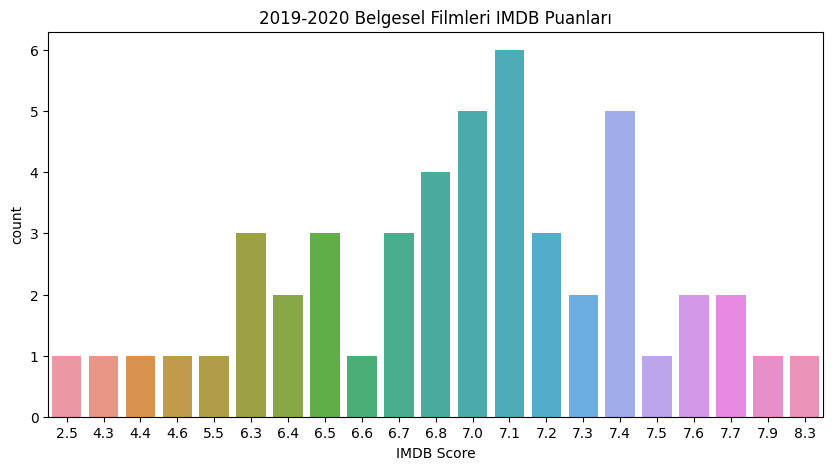

In [82]:
# 2- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

data2 = data[data["date_new"].between('2019-01-01','2020-06-01')]
data2 = data2[data2["Genre"] == "Documentary"]

# veri setini istenen şekilde güncelledik ve countplot kullanarak görselleştirdik.
plt.figure(figsize=(10,5))
plt.title("2019-2020 Belgesel Filmleri IMDB Puanları")
sns.countplot(x="IMDB Score", data = data2)
plt.show()




In [83]:
# 3 - İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
#İngilizce en yüksek imbd filmleri büyükten küçüğe sıraladık 
data3 = data[data["Language"] == "English"]
data3 = data3.sort_values("IMDB Score", ascending=False)
data3
#Görüldüğü üzere 9 IMDB puanı ile 'David Attenborough: A Life on Our Planet' filmi belgesel türündedir.

,Title,Genre,Premiere,Runtime,IMDB Score,Language,date_new
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
...,...,...,...,...,...,...,...
14,Mercy,Thriller,"November 22, 2016",90,4.2,English,2016-11-22
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English,2021-04-22
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,2018-03-23
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05


count     33.000000
mean     115.787879
std       16.999554
min       90.000000
25%      104.000000
50%      114.000000
75%      120.000000
max      149.000000
Name: Runtime, dtype: float64


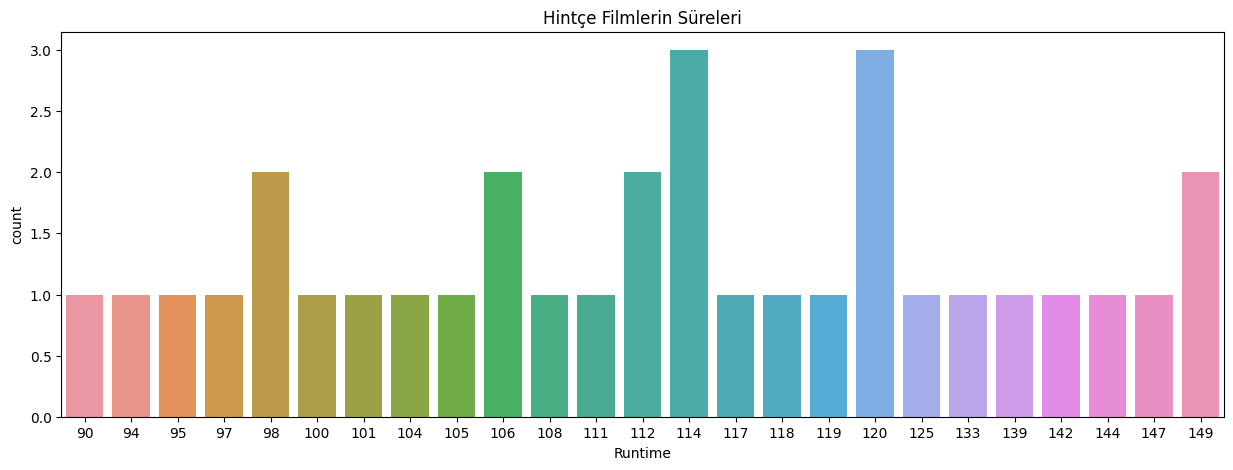

In [84]:
# 4 - 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
data4 = data[data["Language"] == "Hindi"]
print(data4["Runtime"].describe())

plt.figure(figsize=(15,5))
plt.title("Hintçe Filmlerin Süreleri")
sns.countplot(x="Runtime", data = data4)
plt.show()


In [85]:
#5 -'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz


data5 = data["Genre"].drop_duplicates().value_counts()


# 115 farklı tür mevcut fakat 115 değeri anlamlı şekilde görselleştirmek için bir metod bulamadık.

Documentary                             1
Animation / Musicial                    1
Musical comedy                          1
Concert Film                            1
Teen comedy horror                      1
                                       ..
Supernatural drama                      1
Comedy/Fantasy/Family                   1
Comedy-drama                            1
Variety show                            1
Animation/Christmas/Comedy/Adventure    1
Name: Genre, Length: 115, dtype: int64

English    401
Hindi       33
Spanish     31
French      20
Italian     14
Name: Language, dtype: int64


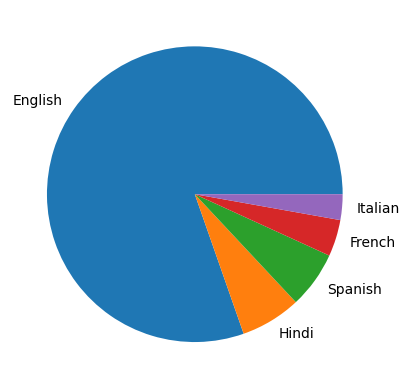

In [102]:
# 6 -Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
lang = data["Language"].value_counts().head(5) #tail()
print(lang)
plt.pie(lang, labels = lang.index)
plt.show()



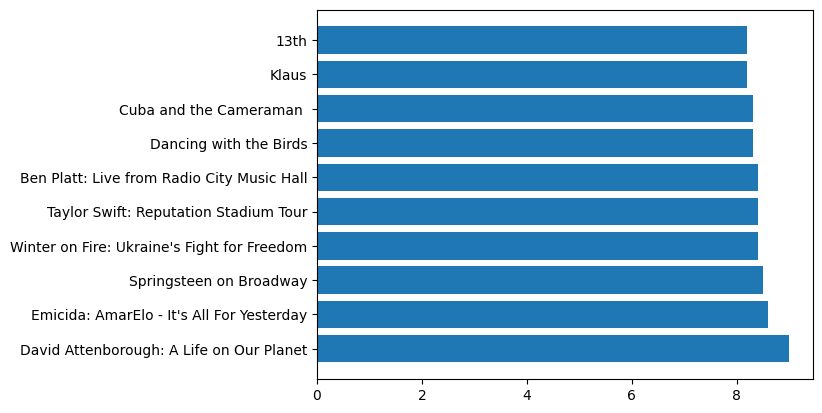

In [101]:
#7 -IMDB puanı en yüksek olan ilk 10 film hangileridir?
fav_movies = data.sort_values("IMDB Score",ascending= False).head(10)
fav_movies[["Title","IMDB Score"]]

plt.barh(fav_movies["Title"],fav_movies["IMDB Score"])
plt.show()
#plt.savefig("graph1")


<AxesSubplot:>

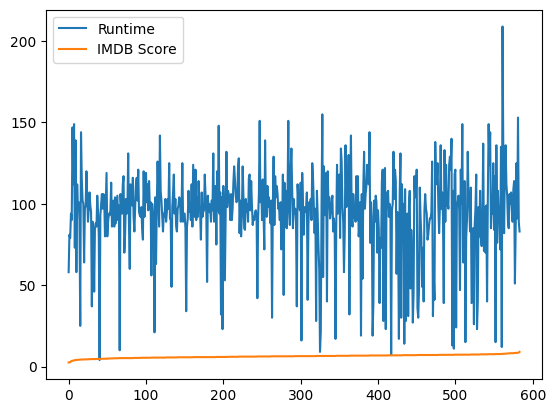

In [100]:
#8-IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
data.corr()
data_corr = data[["Runtime","IMDB Score"]]
data_corr.plot()

Documentary                             6
Concert Film                            2
One-man show                            1
Animation/Christmas/Comedy/Adventure    1
Name: Genre, dtype: int64


<AxesSubplot:>

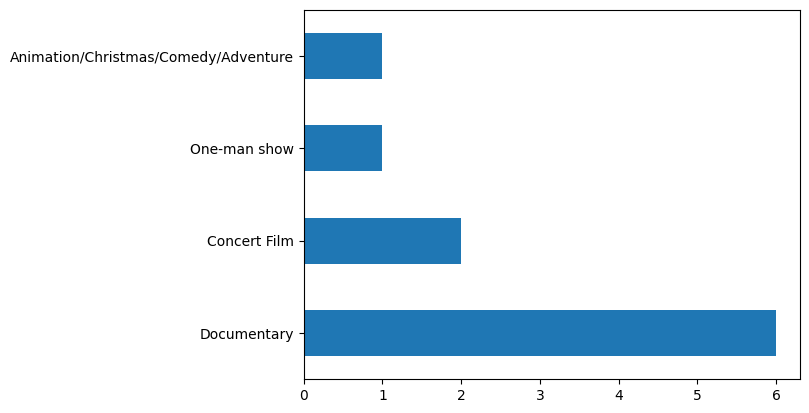

In [99]:
#9-IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
data7 = data[["Genre","IMDB Score"]].sort_values("IMDB Score", ascending=False).head(10)
count = data7["Genre"].value_counts()
print(count)
count.plot.barh()



<BarContainer object of 10 artists>

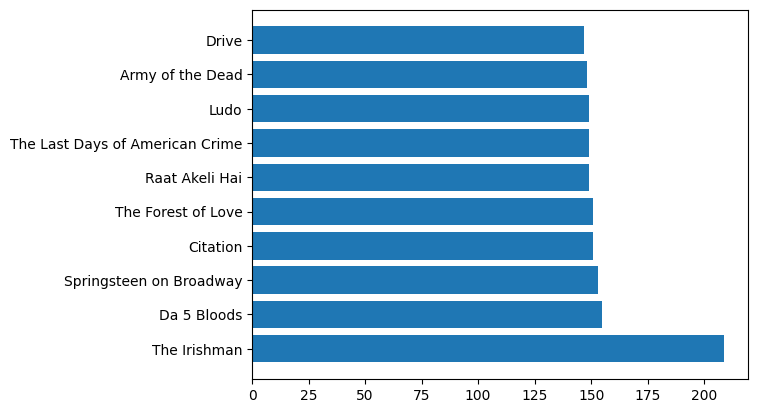

In [98]:
#10-'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
data8 = data[["Title","Runtime"]].sort_values("Runtime",ascending=False).head(10)
plt.barh(data8["Title"],data8["Runtime"])



<AxesSubplot:>

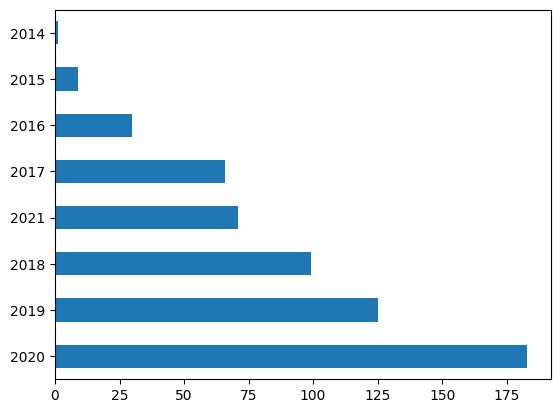

In [97]:
#11-Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz
data["year"] = pd.to_datetime(data['date_new']).dt.year
data9 = data["year"].value_counts()

data9.plot.barh()

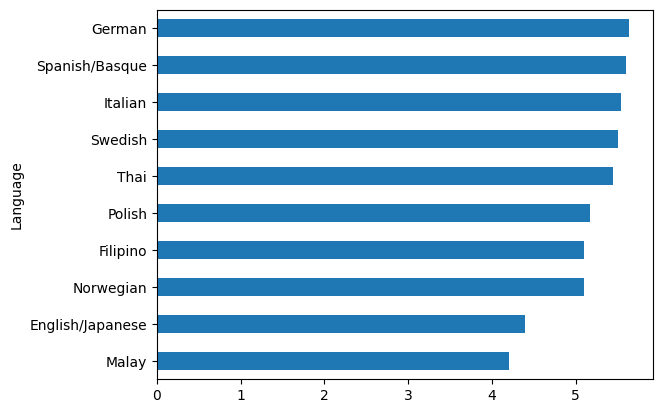

In [96]:
#12- Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz
data10 = data.groupby("Language").mean("IMDB Score")
data10 = data10.sort_values("IMDB Score", ascending=True).head(10)
data10["IMDB Score"]
#label için soralım
plt.ylabel = "IMDB Puanı"
data10["IMDB Score"].plot.barh()
plt.show()



<AxesSubplot:ylabel='year'>

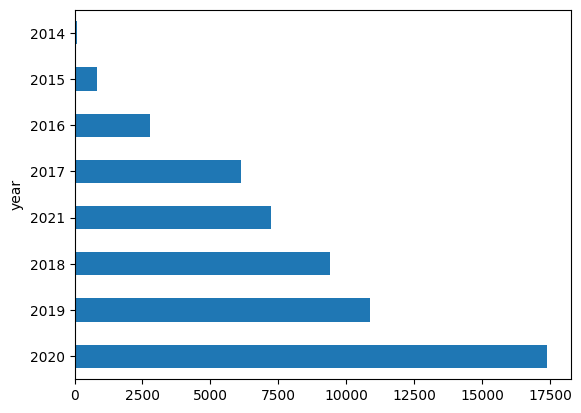

In [94]:
# 13-Hangi yılın toplam "runtime" süresi en fazladır?
data11 = data.groupby("year").sum().sort_values("Runtime",ascending=False)
data11["Runtime"].plot.barh()

In [95]:
#14- Her bir dilin en fazla kullanıldığı "Genre" nedir?
data12 = data.groupby("Language").max()
data12["Genre"]

Language
Bengali                                        Documentary
Dutch                                      Romantic comedy
English                                       Zombie/Heist
English/Akan                                     War drama
English/Arabic                                 Documentary
English/Hindi                                  Documentary
English/Japanese                               Documentary
English/Korean                            Action-adventure
English/Mandarin                               Documentary
English/Russian                                Documentary
English/Spanish                                Documentary
English/Swedish                                Documentary
English/Taiwanese/Mandarin                           Drama
English/Ukranian/Russian                       Documentary
Filipino                                          Thriller
French                                            Thriller
Georgian                                       